In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


# Read and check data

In [2]:
stroke_data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Some visual analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


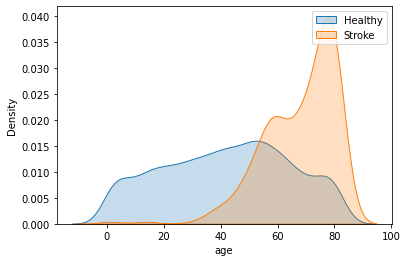

In [5]:
sns.kdeplot(data = stroke_data[stroke_data["stroke"]==0],x = "age",shade = True,label = "Healthy")
sns.kdeplot(data = stroke_data[stroke_data["stroke"]==1],x = "age",shade = True,label = "Stroke")
plt.legend()


## Conclusions:
* Most stroke patients are roughly above 40 years of age and married.
* Chances of getting a stroke is less for people below the age of 25
* People below the age of 30 don't get married that often

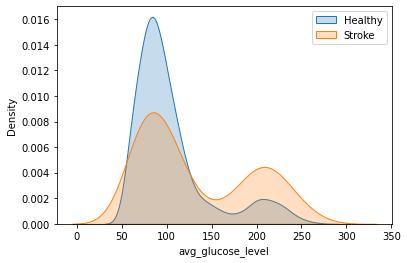

In [6]:

sns.kdeplot(data = stroke_data[stroke_data['stroke'] == 0], x = 'avg_glucose_level', shade = True,   label = "Healthy")
sns.kdeplot(data = stroke_data[stroke_data['stroke'] == 1], x = 'avg_glucose_level', shade = True,   label = "Stroke")
plt.legend()

<AxesSubplot:xlabel='stroke', ylabel='age'>

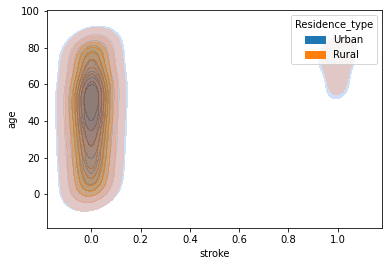

In [7]:
sns.kdeplot(x = stroke_data.stroke,y = stroke_data.age,hue = stroke_data.Residence_type,shade = True,alpha = 0.5)

## Conclusion:
* Doesn't matter if you are in urban or rural area.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


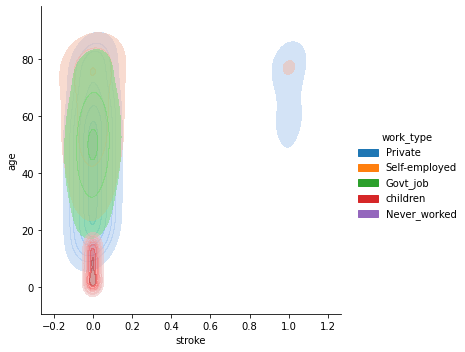

In [8]:
sns.displot(x = stroke_data.stroke,y = stroke_data.age,hue = stroke_data.work_type,kind = 'kde',fill = True,alpha = 0.5)

## Conclusion
* People worked in govt jobs are not prone to stroke

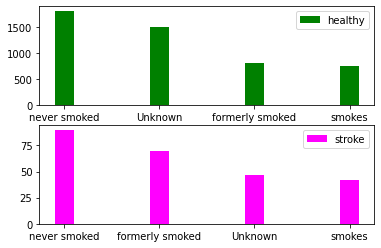

In [9]:
h = stroke_data[stroke_data['stroke']==0].smoking_status.value_counts()
s = stroke_data[stroke_data['stroke']==1].smoking_status.value_counts()
plt.subplot(2,1,1)
plt.bar(h.index,height = h.values,width = 0.2,label = "healthy",color = "green")
plt.legend()
plt.subplot(2,1,2)
plt.bar(s.index,height = s.values,width = 0.2,label = "stroke",color = "magenta")
plt.legend()



#sns.histplot(data = stroke_data,x = 'stroke',y = 'age',hue = 'smoking_status')

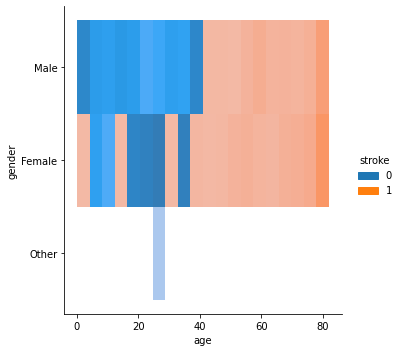

In [10]:
sns.displot(data = stroke_data,x = 'age',y = 'gender',hue = 'stroke')

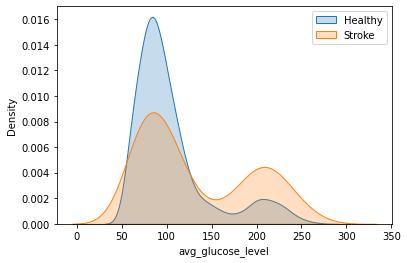

In [11]:
sns.kdeplot(data = stroke_data[stroke_data['stroke'] == 0], x = 'avg_glucose_level', shade = True,   label = "Healthy")
sns.kdeplot(data = stroke_data[stroke_data['stroke'] == 1], x = 'avg_glucose_level', shade = True,   label = "Stroke")
plt.legend()

Text(-5, -70, 'Conclusion \n    For people who had a stroke, the bmi seems to have a major role for people aged 40-80 with single dominating peak \n   Younger people tend to have lower bmi and older people tend to have bmi in the range 25-35 indicated by the double peak.')

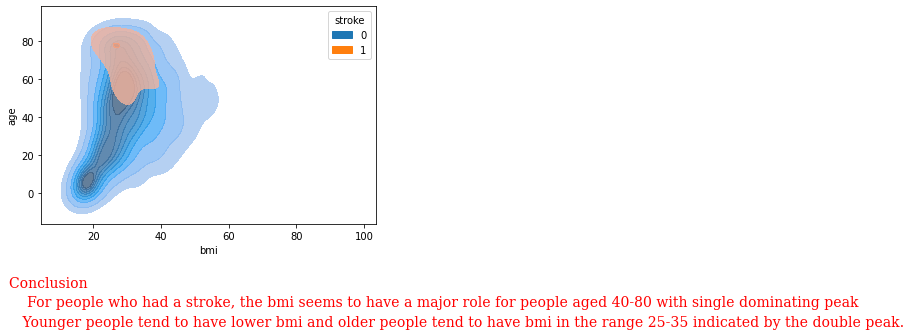

In [12]:
sns.kdeplot(data = stroke_data,x = 'bmi',y = 'age',hue = 'stroke',fill = True,alpha = 0.8)
plt.text(-5,-70,"Conclusion \n    For people who had a stroke, the bmi seems to have a major role for people aged 40-80 with single dominating peak \n   Younger people tend to have lower bmi and older people tend to have bmi in the range 25-35 indicated by the double peak.",{'color':"red",'fontfamily':"serif",'fontsize':14,'fontweight':5,'linespacing':1.5})

## Conclusion:
* For people who had a stroke, the bmi seems to have a major role for people aged 40-80 with single dominating peak
* Younger people tend to have lower bmi and older people tend to have bmi in the range 25-35 indicated by the double peak.

Text(-20, -150, 'Conclusion \n Aged people with irregular blood glucose(high or low) tend to be prone to stroke')

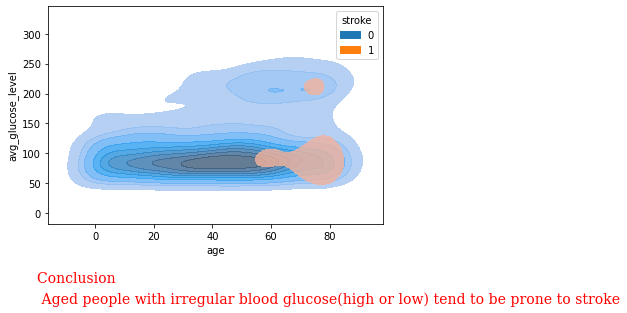

In [13]:
sns.kdeplot(data = stroke_data,x = 'age',y = 'avg_glucose_level',hue = 'stroke',fill = True,alpha = 0.8)
plt.text(-20,-150,"Conclusion \n Aged people with irregular blood glucose(high or low) tend to be prone to stroke",{'color':"red",'fontfamily':"serif",'fontsize':14,'fontweight':5,'linespacing':1.5})

<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

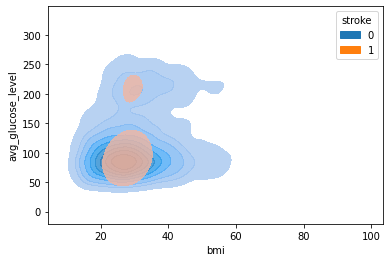

In [14]:
sns.kdeplot(data = stroke_data,x = 'bmi',y = 'avg_glucose_level',hue = 'stroke',fill = True,alpha = 0.8)


In [15]:
correlation_matrix = stroke_data.corr()
correlation_matrix["stroke"]

id                   0.006388
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.042374
stroke               1.000000
Name: stroke, dtype: float64

# Cleaning the data

In [16]:
stroke_labels = stroke_data["stroke"].copy()
stroke_data_drop = stroke_data.drop(["bmi","Residence_type","id","stroke"],axis = 1)

In [17]:
stroke_data_drop.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status
0,Male,67.0,0,1,Yes,Private,228.69,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,202.21,never smoked
2,Male,80.0,0,1,Yes,Private,105.92,never smoked
3,Female,49.0,0,0,Yes,Private,171.23,smokes
4,Female,79.0,1,0,Yes,Self-employed,174.12,never smoked


## One hot encoding the categorical variables

In [18]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
stroke_data_cat = stroke_data_drop[["gender","ever_married","work_type","smoking_status"]]
encoder = OneHotEncoder()
stroke_1hot = encoder.fit_transform(stroke_data_cat)
stroke_1hot

<5110x14 sparse matrix of type '<class 'numpy.float64'>'
	with 20440 stored elements in Compressed Sparse Row format>

In [19]:
encoder.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_attribs = ["gender","ever_married","work_type","smoking_status"]
num_attributes = ["age","hypertension","heart_disease","avg_glucose_level"]

num_pipeline = Pipeline([('std_scaler',StandardScaler())])
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attributes),("cat",OneHotEncoder(),cat_attribs)])
stroke_prepared = full_pipeline.fit_transform(stroke_data_drop)

# Machine Learning

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

for train_index, test_index in sss.split(stroke_prepared, stroke_labels):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = stroke_prepared[train_index], stroke_prepared[test_index]
    y_train, y_test = stroke_labels[train_index], stroke_labels[test_index]

#X_train, X_test, y_train, y_test = train_test_split(stroke_prepared,stroke_labels, test_size=0.2, random_state=1)

TRAIN: [2051 2065 1201 ... 3064 1511 4232] TEST: [2820 1722 3591 ... 2654 4705 4910]
TRAIN: [ 418 2571 4937 ... 4942 4739 3957] TEST: [ 232  182  176 ...  425 2050 2846]
TRAIN: [1651 4282  424 ... 3415 4937 2270] TEST: [4565 2140 1248 ... 3206 2644 2891]
TRAIN: [ 335 2631 2661 ... 4663 2654 2595] TEST: [5108 4498 3701 ...  807 4185 2182]
TRAIN: [2318 1067 4692 ...  604 3730  493] TEST: [4052 4821 1069 ... 3924 3818 4527]


In [22]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(1000,500,500,100,10), activation = 'logistic',solver='adam', alpha=0.0001, batch_size='auto',max_iter=200, shuffle=True, random_state=1, verbose=True)
clf.fit(X_train,y_train)

Iteration 1, loss = 0.54790349
Iteration 2, loss = 0.40494414
Iteration 3, loss = 0.36835345
Iteration 4, loss = 0.34861997
Iteration 5, loss = 0.33419474
Iteration 6, loss = 0.32218195
Iteration 7, loss = 0.31141604
Iteration 8, loss = 0.29993179
Iteration 9, loss = 0.28533607
Iteration 10, loss = 0.27233107
Iteration 11, loss = 0.26217452
Iteration 12, loss = 0.25375747
Iteration 13, loss = 0.24669266
Iteration 14, loss = 0.24077432
Iteration 15, loss = 0.23550057
Iteration 16, loss = 0.23099555
Iteration 17, loss = 0.22708456
Iteration 18, loss = 0.22369938
Iteration 19, loss = 0.22061876
Iteration 20, loss = 0.21789565
Iteration 21, loss = 0.21546758
Iteration 22, loss = 0.21326314
Iteration 23, loss = 0.21135200
Iteration 24, loss = 0.20964277
Iteration 25, loss = 0.20805810
Iteration 26, loss = 0.20668823
Iteration 27, loss = 0.20541158
Iteration 28, loss = 0.20429577
Iteration 29, loss = 0.20329596
Iteration 30, loss = 0.20241156
Iteration 31, loss = 0.20158283
Iteration 32, los

MLPClassifier(activation='logistic',
              hidden_layer_sizes=(1000, 500, 500, 100, 10), random_state=1,
              verbose=True)

In [23]:
y_pred = clf.predict(X_test)
from sklearn.metrics import mean_squared_error
clf.score(X_test,y_test)


0.9510763209393346

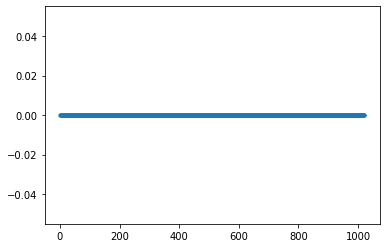

In [24]:
plt.plot(y_pred,'.')

In [25]:
clf.fit(stroke_data.age.to_numpy().reshape(-1,1),stroke_data.stroke)
clf.score(stroke_data.age.to_numpy().reshape(-1,1),stroke_data.stroke)

Iteration 1, loss = 0.27746087
Iteration 2, loss = 0.22025621
Iteration 3, loss = 0.20786020
Iteration 4, loss = 0.20246164
Iteration 5, loss = 0.19939405
Iteration 6, loss = 0.19760457
Iteration 7, loss = 0.19648398
Iteration 8, loss = 0.19583136
Iteration 9, loss = 0.19543148
Iteration 10, loss = 0.19519272
Iteration 11, loss = 0.19509502
Iteration 12, loss = 0.19498886
Iteration 13, loss = 0.19492373
Iteration 14, loss = 0.19492386
Iteration 15, loss = 0.19487089
Iteration 16, loss = 0.19490546
Iteration 17, loss = 0.19485858
Iteration 18, loss = 0.19485713
Iteration 19, loss = 0.19485736
Iteration 20, loss = 0.19485341
Iteration 21, loss = 0.19487641
Iteration 22, loss = 0.19486414
Iteration 23, loss = 0.19484103
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.9512720156555773

In [26]:
clf.predict(np.array([45,25,89,10,32]).reshape(-1,1))

array([0, 0, 0, 0, 0])